### Naive Bayes and PCA for cancer classification (malignant-benignt)

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Data Perparation

In [2]:
cancer= load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
len(cancer['data'])

569

In [4]:
cancer['feature_names'] #30 features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### PCA

Lets visualize pca transformation on data (first two components)

In [5]:
data= cancer.data
labels= cancer.target
labels_names= cancer.target_names

pca= PCA(n_components=10)
X_r= pca.fit_transform(data)
y= labels
print(f"PCA explained variance ratio (first ten components): {np.round(pca.explained_variance_ratio_,4)}")

PCA explained variance ratio (first ten components): [9.82e-01 1.62e-02 1.60e-03 1.00e-04 1.00e-04 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00]


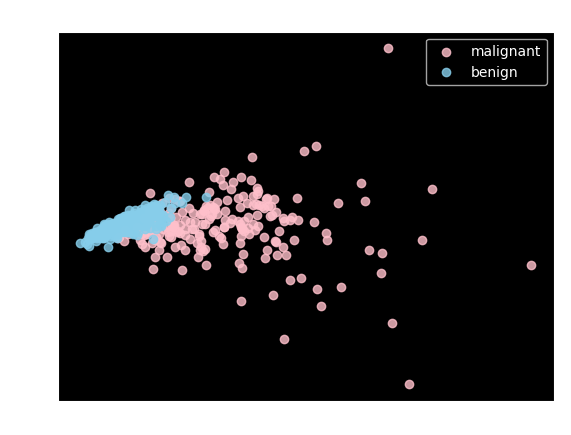

In [6]:
plt.figure()
plt.style.use('dark_background')
colors= ["pink", "skyblue"]

#First two components are used bc are the ones with the most variance
for color, i, target_name in zip(colors, [0, 1], labels_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, label=target_name
    )
plt.legend()
plt.title("PCA of cancer breast dataset")
plt.show()

#### Naive Bayes without PCA

              precision    recall  f1-score   support

   malignant       0.96      0.89      0.92        53
      benign       0.94      0.98      0.96        90

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



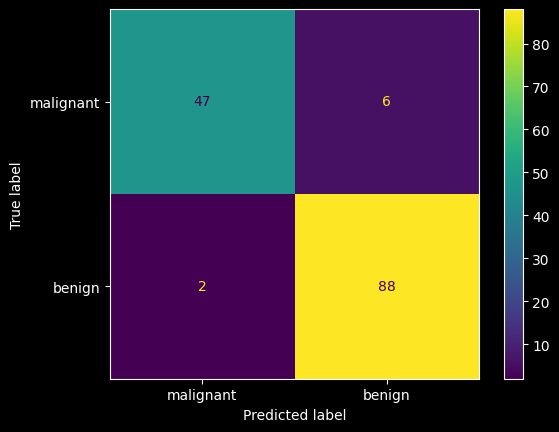

In [7]:
#standarizing data
scaler= StandardScaler()
normaliced_data= scaler.fit_transform(data) 

#Data splitting for trainging
X_train, X_test, y_train, y_test = train_test_split(
    normaliced_data, labels, test_size = 0.25, stratify= labels
)

#Prediction
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Results
print(classification_report(y_test, y_pred, target_names=labels_names))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_names)
disp.plot()

#### Naive Bayes with PCA

              precision    recall  f1-score   support

   malignant       0.94      0.85      0.89        53
      benign       0.92      0.97      0.94        90

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



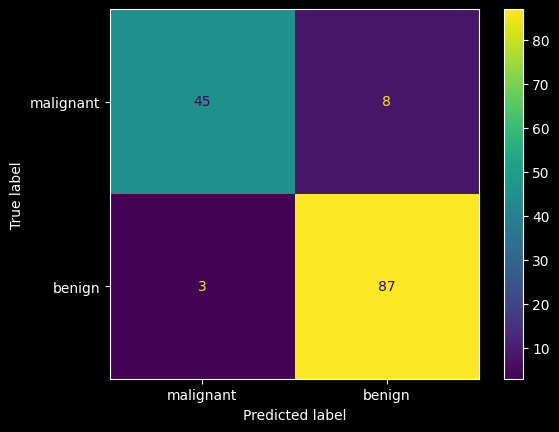

In [8]:
#Dimension reduction
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test) 


#Prediction
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Results
print(classification_report(y_test, y_pred, target_names=labels_names))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_names)
disp.plot()